# Hierarchical Clustering with Normalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("wholesale_customers_data.csv")

In [3]:
data.shape

(440, 8)

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


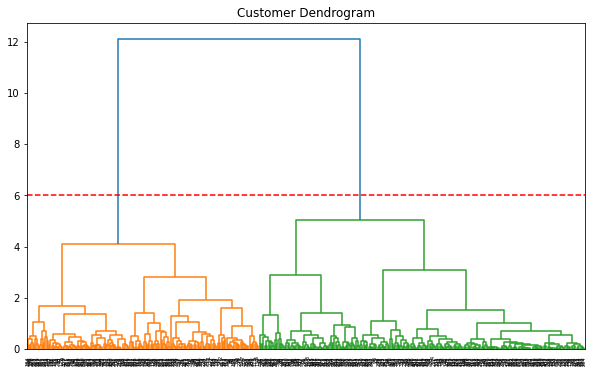

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 6))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))
plt.axhline(y =6, color = 'r', linestyle = '--')

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', 
                                 linkage = 'ward')
cluster.fit_predict(data_scaled)
print(cluster.labels_)

[1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1]


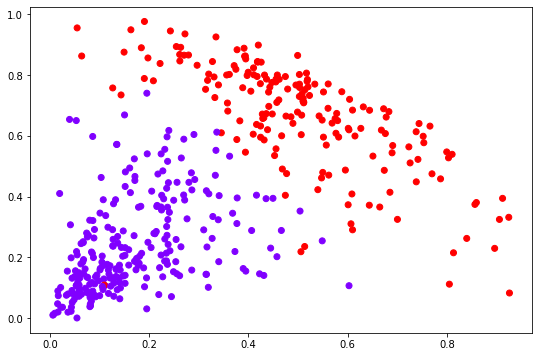

In [8]:
plt.figure(figsize = (9, 6))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c = cluster.labels_, 
            cmap = 'rainbow')